In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Imports

In [2]:
import sys
sys.executable

'/Users/tudorl/Documents/workspace/personal/dtreeviz/venv/bin/python'

In [3]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_importance, plot_tree, plotting

from dtreeviz import trees 

import graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import pandas as pd
import numpy as np
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.xgb_decision_tree import ShadowXGBDTree

In [4]:
pd.options.display.max_rows = 999

# Train

In [5]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [6]:
dtrain = xgb.DMatrix(dataset[features], dataset[target])

In [7]:
params = {"max_depth":3, "eta":0.05, "objective":"binary:logistic", "subsample":1}
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=8)

In [8]:
xgb_model.trees_to_dataframe().query("Tree == 0")

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
0,0,0,0-0,Sex_label,1.00,0-1,0-2,0-1,246.604279,222.75
1,0,1,0-1,Pclass,3.00,0-3,0-4,0-3,60.127525,78.50
2,0,2,0-2,Cabin_label,4.00,0-5,0-6,0-5,29.516968,144.25
3,0,3,0-3,Leaf,NaN,NaN,NaN,NaN,0.087356,42.50
4,0,4,0-4,Fare,23.35,0-7,0-8,0-7,17.870434,36.00
5,0,5,0-5,Age,3.50,0-9,0-10,0-9,14.429703,118.25
6,0,6,0-6,Age,17.50,0-11,0-12,0-11,8.358520,26.00
7,0,7,0-7,Leaf,NaN,NaN,NaN,NaN,0.017355,29.25
8,0,8,0-8,Leaf,NaN,NaN,NaN,NaN,-0.067742,6.75
9,0,9,0-9,Leaf,NaN,NaN,NaN,NaN,0.022222,3.50


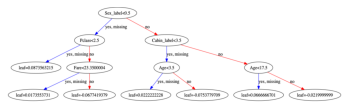

In [9]:
# rcParams['figure.figsize'] = 50,30
plot_tree(xgb_model)

# save the model

In [10]:
import joblib
# joblib.dump(xgb_model, "xgb_model")

# Init shadow tree

In [11]:
d = dataset[features + [target]]
d_matrix = xgb.DMatrix(d)

In [12]:
xgb_shadow = ShadowXGBDTree(xgb_model, 1, d[features], d[target], features, target, class_names=[0, 1])

# Visualisations classifier

## viz_leaf_samples

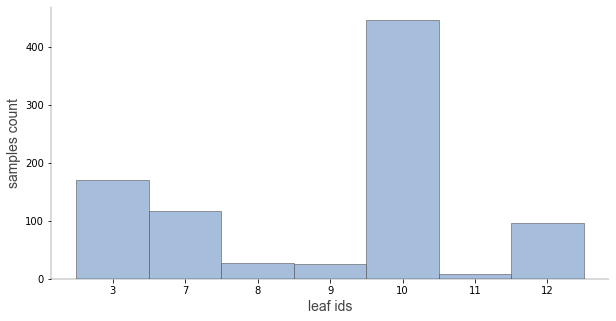

In [13]:
trees.viz_leaf_samples(xgb_model, d[features], features, tree_index=1)

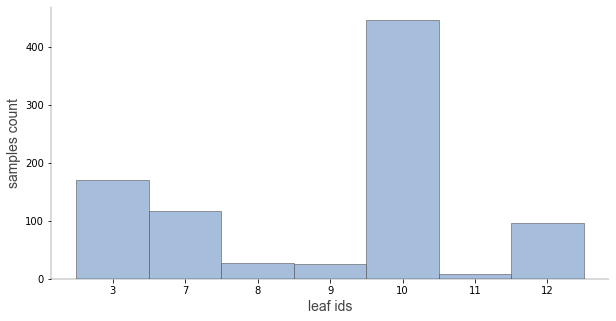

In [14]:
trees.viz_leaf_samples(xgb_shadow)

## ctreeviz_leaf_samples

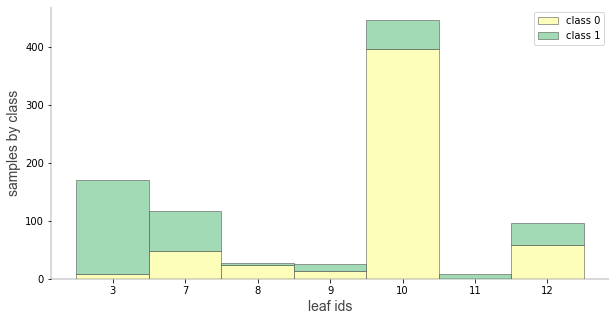

In [15]:
trees.ctreeviz_leaf_samples(xgb_model, d[features], d[target], features, tree_index=1  )

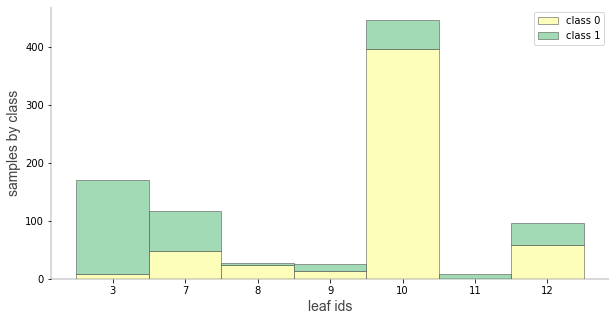

In [16]:
trees.ctreeviz_leaf_samples(xgb_shadow)

## dtreeviz

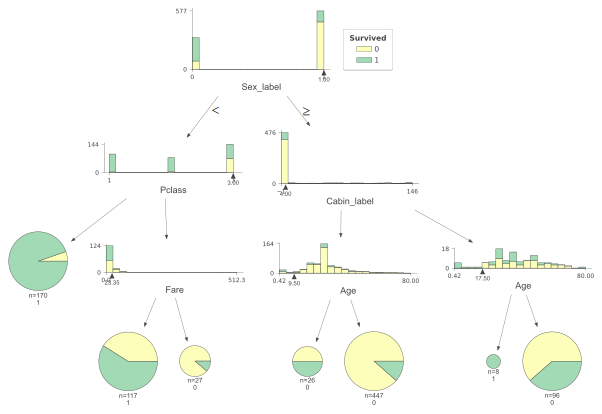

In [17]:
trees.dtreeviz(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1)

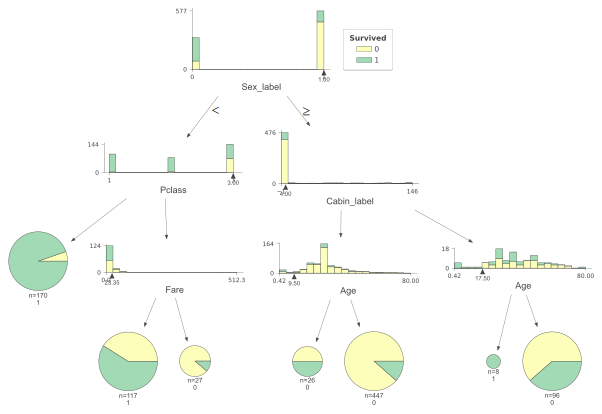

In [18]:
trees.dtreeviz(xgb_shadow)

## describe_node_sample

In [20]:
trees.describe_node_sample(xgb_model, 1, d[features], feature_names=features, tree_index=1)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,314.000000,314.000000,314.000000,314.0,314.000000,314.000000
mean,2.159236,28.216730,44.479818,0.0,23.745223,1.401274
std,0.857290,12.877543,57.997698,0.0,43.225526,0.863605
min,1.000000,0.750000,6.750000,0.0,-1.000000,-1.000000
25%,1.000000,21.000000,12.071875,0.0,-1.000000,1.000000
50%,2.000000,29.699118,23.000000,0.0,-1.000000,2.000000
75%,3.000000,35.000000,55.000000,0.0,35.750000,2.000000
max,3.000000,63.000000,512.329200,0.0,145.000000,2.000000


In [21]:
trees.describe_node_sample(xgb_shadow, 1)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,314.000000,314.000000,314.000000,314.0,314.000000,314.000000
mean,2.159236,28.216730,44.479818,0.0,23.745223,1.401274
std,0.857290,12.877543,57.997698,0.0,43.225526,0.863605
min,1.000000,0.750000,6.750000,0.0,-1.000000,-1.000000
25%,1.000000,21.000000,12.071875,0.0,-1.000000,1.000000
50%,2.000000,29.699118,23.000000,0.0,-1.000000,2.000000
75%,3.000000,35.000000,55.000000,0.0,35.750000,2.000000
max,3.000000,63.000000,512.329200,0.0,145.000000,2.000000


## explain_prediction_path

In [22]:
X = dataset[features].iloc[10]

In [23]:
X

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

In [25]:
print(trees.explain_prediction_path(xgb_model, X, dataset[features], dataset[target], explanation_type="plain_english", feature_names=features, tree_index=1))

3.0 <= Pclass 
Fare < 23.35
Sex_label < 1.0



In [27]:
print(trees.explain_prediction_path(xgb_shadow, X, explanation_type="plain_english"))

3.0 <= Pclass 
Fare < 23.35
Sex_label < 1.0



# Regressor

## Visualisations regressor

In [28]:
features_reg = ["Pclass", "Survived", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target_reg = "Age"

In [29]:
dtrain_reg = xgb.DMatrix(dataset[features_reg], dataset[target_reg])
params_reg = {"max_depth":3, "eta":0.05, "objective":"reg:squarederror", "subsample":1}
xgb_model_reg = xgb.train(params=params_reg, dtrain=dtrain_reg, num_boost_round=8)

In [30]:
xgb_shadow_reg = ShadowXGBDTree(xgb_model_reg, 1, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

### dtreeviz

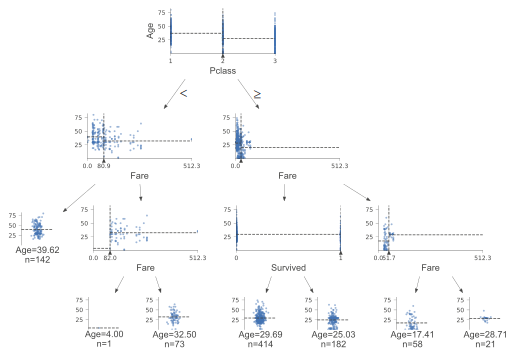

In [31]:
trees.dtreeviz(xgb_shadow_reg)

### viz_leaf_samples

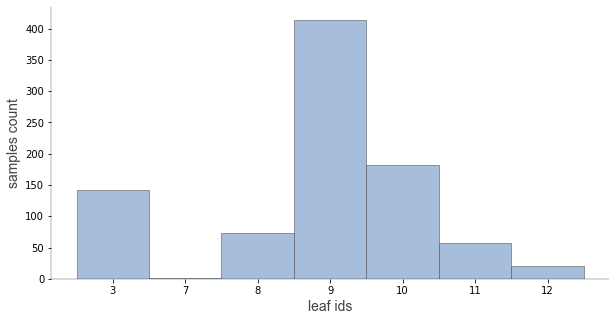

In [32]:
trees.viz_leaf_samples(xgb_model_reg, dataset[features_reg], features_reg, tree_index=1)

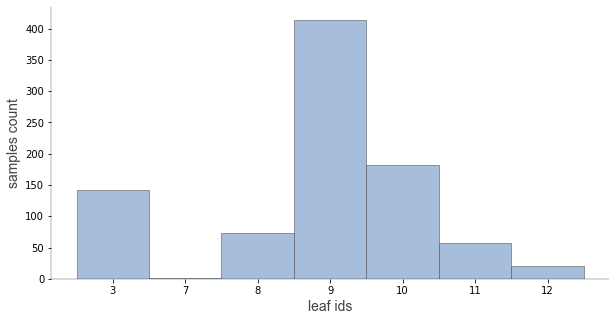

In [33]:
trees.viz_leaf_samples(xgb_shadow_reg)

### describe_node_sample

In [34]:
trees.describe_node_sample(xgb_model_reg, node_id=9, x_data=dataset[features_reg], feature_names=features_reg, tree_index=1)

,Pclass,Survived,Fare,Sex_label,Cabin_label,Embarked_label
count,414.000000,414.0,414.000000,414.000000,414.000000,414.000000
mean,2.792271,0.0,11.021476,0.855072,1.966184,1.678744
std,0.406173,0.0,5.698663,0.352454,20.066568,0.664333
min,2.000000,0.0,0.000000,0.000000,-1.000000,0.000000
25%,3.000000,0.0,7.750000,1.000000,-1.000000,2.000000
50%,3.000000,0.0,8.050000,1.000000,-1.000000,2.000000
75%,3.000000,0.0,13.000000,1.000000,-1.000000,2.000000
max,3.000000,0.0,27.750000,1.000000,145.000000,2.000000


In [35]:
trees.describe_node_sample(xgb_shadow_reg, node_id=9)

,Pclass,Survived,Fare,Sex_label,Cabin_label,Embarked_label
count,414.000000,414.0,414.000000,414.000000,414.000000,414.000000
mean,2.792271,0.0,11.021476,0.855072,1.966184,1.678744
std,0.406173,0.0,5.698663,0.352454,20.066568,0.664333
min,2.000000,0.0,0.000000,0.000000,-1.000000,0.000000
25%,3.000000,0.0,7.750000,1.000000,-1.000000,2.000000
50%,3.000000,0.0,8.050000,1.000000,-1.000000,2.000000
75%,3.000000,0.0,13.000000,1.000000,-1.000000,2.000000
max,3.000000,0.0,27.750000,1.000000,145.000000,2.000000


### explain_prediction_path

In [36]:
X_reg = dataset[features_reg].iloc[10]
X_reg

Pclass              3.0
Survived            1.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

In [38]:
print(trees.explain_prediction_path(xgb_shadow_reg, X_reg, explanation_type="plain_english"))

2.0 <= Pclass 
1.0 <= Survived 
Fare < 27.83



### viz_leaf_target

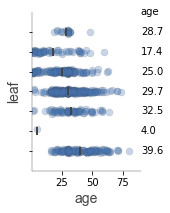

In [39]:
trees.viz_leaf_target(xgb_model_reg, dataset[features_reg], dataset[target_reg], feature_names=features_reg, target_name=target_reg, tree_index=1)

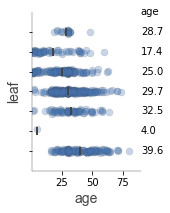

In [40]:
trees.viz_leaf_target(xgb_shadow_reg)

### rtreeviz_univar

In progress...

In [39]:
# features_reg_univar = ["Pclass"]
# target_reg_univar = "Age"

# dtrain_reg_univar = xgb.DMatrix(dataset[features_reg_univar], dataset[target_reg_univar])
# params_reg_univar = {"max_depth":3, "eta":0.05, "objective":"reg:squarederror", "subsample":1}
# xgb_model_reg_univar = xgb.train(params=params_reg_univar, dtrain=dtrain_reg_univar, num_boost_round=8)

# xgb_shadow_reg_univar = ShadowXGBDTree(xgb_model_reg_univar, 1, dataset[features_reg_univar], dataset[target_reg_univar], features_reg_univar, target_reg_univar)
# trees.rtreeviz_univar(xgb_shadow_reg_univar, dataset[features_reg_univar], dataset[target_reg_univar], features_reg_univar, target_reg_univar)

## Unit test
The following code will help us during unit testing process

In [40]:
features_reg_test = ["Pclass", "Survived", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target_reg_test = "Age"

In [41]:
dataset_reg_test = pd.read_csv("../testing/dtreeviz/models/fixtures/dataset.csv")

In [42]:
dtrain_reg_test = xgb.DMatrix(dataset_reg_test[features_reg_test], dataset_reg_test[target_reg_test])
params_reg_test = {"max_depth":3, "eta":0.05, "objective":"reg:squarederror", "subsample":1}
xgb_model_reg_test = xgb.train(params=params_reg, dtrain=dtrain_reg_test, num_boost_round=8)

### Save the model

In [43]:
import joblib

In [44]:
#joblib.dump(xgb_model_reg_test, "/Users/tudorl/Documents/workspace/personal/dtreeviz/testing/dtreeviz/models/fixtures/xgb_model_regressor.joblib")



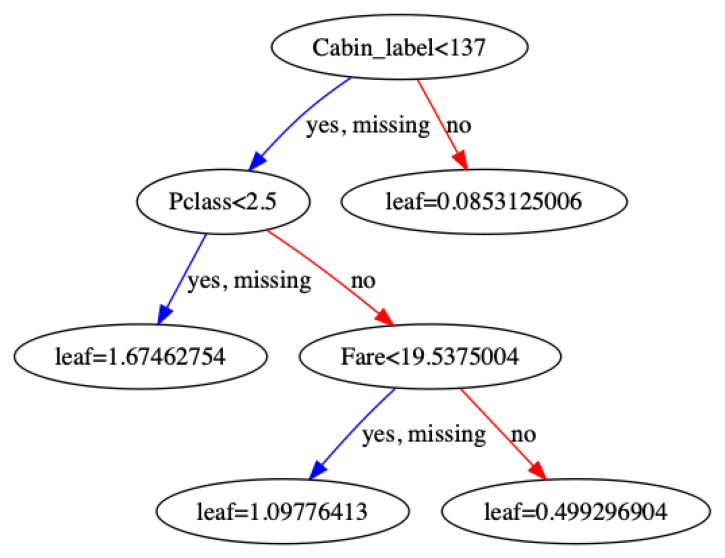

In [45]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model_reg_test, num_trees=1)

In [46]:
node_data = dataset_reg_test.query("Cabin_label < 137 and Pclass >= 2.5 and Fare >= 19.5375004")
node_data

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
7,3,2.0,21.075,1,-1,2,0
13,3,39.0,31.275,1,-1,2,0
16,3,2.0,29.125,1,-1,1,0


In [47]:
np.mean(node_data["Age"])

14.333333333333334